In [95]:
import numpy as np
from scipy import stats, special, integrate
import matplotlib.pyplot as plt
import seaborn as sns

# Qing & Franke (2014)

## General stuff about model

- $\phi (h)$ is the distribution of $h$ in the comparison class (prior)
- $\Theta$ is the threshold for "tall"
- $\phi (h \mid u_0, \Theta) = \phi(h)$
- $\phi (h \mid u_1, \Theta) = \phi(h \mid h \geq \Theta) $, i.e. the survival function of $\phi$ at $\Theta$, if $h\geq$ and 0 otherwise

Expected communicative success:
\begin{align}
ES(\Theta) & = \int_{-\infty}^{\Theta} \phi (h) \phi (h \mid u_0, \Theta) dh + \int_{\Theta}^{\infty} \phi (h) \phi (h \mid u_1, \Theta) dh \\
& = \int_{-\infty}^{\Theta} \phi (h)^2 dh + \int_{\Theta}^{\infty} \phi (h) \frac{\phi(h)}{ \int_{\Theta}^{\infty} \phi (h) dh} dh \\
& = \int_{-\infty}^{\Theta} \phi (h)^2 dh + \frac{1}{ \int_{\Theta}^{\infty} \phi (h) dh} \int_{\Theta}^{\infty} \phi(h)^2 dh
\end{align}

Calculate utility:

\begin{align}
U(\Theta) & = ES(\Theta) - c \int_{\Theta}^{\infty} \phi(h) dh \\
& = \int_{-\infty}^{\Theta} \phi (h)^2 dh + \frac{1}{ \int_{\Theta}^{\infty} \phi (h) dh} \int_{\Theta}^{\infty} \phi(h)^2 dh  - c \int_{\Theta}^{\infty} \phi(h) dh
\end{align}

Now the probability of production:
$$
Pr(\Theta) \propto e^{\lambda U(\Theta)} 
$$

Probability of using positive form given an observed height $h_0$:
$$
\sigma (u_1 \mid h_0, Pr) = \int_{-\infty}^{h_0} Pr(\Theta) d\Theta
$$

Understanding, i.e. distribution over degrees given signal:
$$
\rho (h \mid u_1) \propto \phi(h) \sigma ( u_1 \mid h, Pr )
$$

## Specifically for Beta distribution. 

Start by considering the Chebyshev integral: http://mathworld.wolfram.com/ChebyshevIntegral.html:
$$
\int x^{p} (1-x)^q dx = B(x; 1+p, 1+q)
$$

I am interested in the integral of the square of the beta density:
$$
\int_0^\Theta \left( \frac{1}{B(\alpha, \beta)} x^{\alpha-1} (1-x)^{\beta-1} \right)^2 dx \\
= \frac{1}{B(\alpha, \beta)^2} \int_0^\Theta x^{2\alpha-2} (1-x)^{2\beta-2} dx \\
$$

Putting the two things together:
$$
\frac{1}{B(\alpha, \beta)^2} \int_0^\Theta x^{2\alpha-2} (1-x)^{2\beta-2} dx = \frac{B(x; 2\alpha-1, 2\beta-1)}{B(\alpha, \beta)^2}
$$
Check numerically that they are actually the same:

In [25]:
theta = 0.1
alpha, beta = 2,21

func = lambda x: (x**(2 * alpha - 2)) * ((1-x)**(2*beta - 2))

print(quad(func, 0, theta)[0] / (special.beta(alpha, beta)**2))

print((special.betainc(2*alpha-1, 2*beta-1, theta) * special.beta(2*alpha-1, 2*beta-1))/ (special.beta(alpha, beta)**2))

4.713713169744543
4.713713169744545


Next, I need it from $\Theta$ to 1:
$$
\frac{1}{B(\alpha, \beta)^2} \int_\Theta^1 x^{2\alpha-2} (1-x)^{2\beta-2} dx \\
= \frac{1}{B(\alpha, \beta)^2} \left( \int_0^1 x^{2\alpha-2} (1-x)^{2\beta-2} dx - \int_0^\Theta x^{2\alpha-2} (1-x)^{2\beta-2} dx \right) \\
= \frac{B(2 \alpha-1, 2\beta-1) - B(x; 2\alpha-1, 2\beta-1)}{B(\alpha, \beta)^2} 
$$

In sum, when the property has a beta distribution:
$$
U(\Theta) = \frac{B(\Theta; 2\alpha-1, 2\beta-1)}{B(\alpha, \beta)^2} + \frac{B(2 \alpha-1, 2\beta-1) - B(\Theta; 2\alpha-1, 2\beta-1)}{(1-I_\Theta (\alpha, \beta)) B(\alpha, \beta)^2} - c (1-I_\Theta (\alpha, \beta))
$$

In [182]:
def U(theta, alpha, beta, cost):
    incomplete_beta_for_cdf = special.betainc(2*alpha-1, 2*beta-1, theta) * special.beta(2*alpha-1, 2*beta-1)
    beta_for_cdf = special.beta(2*alpha-1, 2*beta-1)
    beta_squared = special.beta(alpha, beta)**2
    survival = 1 - special.betainc(alpha, beta, theta)
    
    first_term = incomplete_beta_for_cdf / beta_squared
    second_term = (beta_for_cdf - incomplete_beta_for_cdf)/(survival * beta_squared)
    third_term = cost * survival
    return first_term + second_term - third_term

def unnorm_pr(theta, alpha, beta, cost, lamb):
    return np.exp(lamb * U(theta, alpha, beta, cost))

### Figure 3

In [214]:
def move_legend(leg, ax, x_offset):
    # Get the bounding box of the original legend
    bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

    # Change to location of the legend. 
    bb.x0 += x_offset
    bb.x1 += x_offset
    leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

C:\Users\s1569804\AppData\Local\Continuum\anaconda3\envs\computational_models\lib\site-packages\ipykernel_launcher.py:24: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
C:\Users\s1569804\AppData\Local\Continuum\anaconda3\envs\computational_models\lib\site-packages\ipykernel_launcher.py:24: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
C:\Users\s1569804\AppData\Local\Continuum\anaconda3\envs\computational_models\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\s1569804\AppData\Local\Continuum\anaconda3\envs\computational_models\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can a

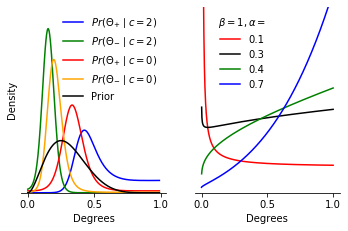

In [219]:
fig, (ax1, ax2) = plt.subplots(1,2)

# left plot

# cost, alpha, beta, lamb, polarity
par_sets = np.array([
    [2, 3, 7, 4, 1],
    [2, 7, 3, 4, 0],
    [0, 3, 7, 4, 1],
    [0, 7, 3, 4, 0]
])

colors = ["blue", "green", "red", "orange"]
labels = ["$Pr(\Theta_{+} \mid c=2)$", 
          "$Pr(\Theta_{-} \mid c=2)$",
          "$Pr(\Theta_{+} \mid c=0)$",
          "$Pr(\Theta_{-} \mid c=0)$"]

for index, parameter_set in enumerate(par_sets):
    cost, alpha, beta, lamb, polarity = parameter_set
    func = lambda theta: unnorm_pr(theta, alpha, beta, cost, lamb)
    # xs = np.linspace(0,1,1000)[1:-1]
    # ys_grid = [func(x) for x in xs]
    norm_const = integrate.quad(func, 0.0, 0.996, limit=1000, points=(0,1))[0]

    xs = np.linspace(0,0.99,1000)
    ys = np.array([func(x) for x in xs]) / norm_const
    if polarity:
        ax1.plot(xs, ys, color=colors[index], label=labels[index])
    else:
        ax1.plot(np.flip(xs), ys, color=colors[index], label=labels[index])

ax1.plot(xs, stats.beta.pdf(xs, 3, 7), color="black", label="Prior")
ax1.set_ylim(0,10)

ax1.legend(frameon=False)

# right plot

cost, lamb = 0.2, 4
alphas, colors = [0.1, 0.3, 0.4, 0.7], ["red", "black", "green", "blue"]
for index in range(len(alphas)):
    func = lambda theta: unnorm_pr_fixed_beta(theta, alphas[index], cost, lamb)
    xs = np.linspace(0.001,1,1000)[1:-1]
    ys_grid = [func(x) for x in xs]
#     print(ys_grid)
    norm_const = integrate.simps(ys_grid, xs)
    
    xs = np.linspace(0,1,1000)
    ys = np.array([func(x) for x in xs]) / norm_const
    ax2.plot(xs, ys, color=colors[index], label=str(alphas[index]))

leg2 = ax2.legend(title=r"$\beta=1, \alpha=$", frameon=False)
move_legend(leg2, ax2, 0.1)
ax2.set_ylim(0,2.5)

ax1.set_ylabel("Density")

for ax in [ax1, ax2]:
    ax.set_xlabel("Degrees")

    for text in ["top", "left", "right"]:
        ax.spines[text].set_visible(False)
    ax.set_yticks([])

w = 5.708
fig.set_size_inches(w, w*0.6)
plt.savefig("qingFranke2014.png", dpi=300)

## Beta distribution with $\beta=1$

Various useful bits:

$$
\int_{0}^{\Theta} \phi (h)^2 dh = \int_0^\Theta \alpha^2 x^{2\alpha-2} dx = \alpha^2 \frac{\Theta^{2\alpha-1}}{2\alpha-1} \\
\int_{\Theta}^{1} \phi (h)^2 dh = \int_{\Theta}^{1} \alpha^2 x^{2\alpha-2} dx = \frac{\alpha^2}{2\alpha-1} - \alpha^2 \frac{\Theta^{2\alpha-1}}{2\alpha-1} = \frac{\alpha^2 \left( 1 - \Theta^{2\alpha-1} \right)}{2\alpha-1}\\
\int_{0}^{\Theta} \phi (h) dh = \int_0^\Theta \alpha x^{\alpha-1} dx = \Theta^\alpha \\
\int_{\Theta}^{1} \phi (h) dh = 1-\int_0^\Theta \alpha x^{\alpha-1} dx = 1-\Theta^\alpha 
$$

Finally, ES:
$$
ES(\Theta) = \alpha^2 \frac{\Theta^{2\alpha-1}}{2\alpha-1} + \frac{1}{1-\Theta^\alpha}\frac{\alpha^2 \left( 1 - \Theta^{2\alpha-1} \right)}{2\alpha-1} - c (1 - \Theta^\alpha)
$$

In [180]:
def U_fixed_beta(theta, alpha, cost):
    first_term = np.square(alpha)*(theta**(2*alpha-1)/(2*alpha-1))
    second_term = (1/(1-theta**alpha))*((np.square(alpha)*(1-theta**(2*alpha-1)))/(2*alpha-1))
    third_term = cost*(1-theta**alpha)
    return first_term + second_term - third_term

def unnorm_pr_fixed_beta(theta, alpha, cost, lamb):
    return np.exp(lamb * U_fixed_beta(theta, alpha, cost))

## Figure 4

C:\Users\s1569804\AppData\Local\Continuum\anaconda3\envs\computational_models\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\s1569804\AppData\Local\Continuum\anaconda3\envs\computational_models\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\s1569804\AppData\Local\Continuum\anaconda3\envs\computational_models\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\s1569804\AppData\Local\Continuum\anaconda3\envs\computational_models\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


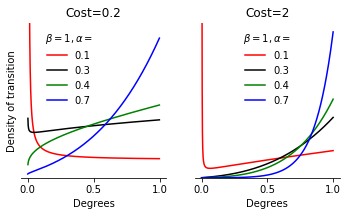

In [217]:
fig, (ax1, ax2) = plt.subplots(1, 2)

cost, lamb = 0.2, 4
alphas, colors = [0.1, 0.3, 0.4, 0.7], ["red", "black", "green", "blue"]
for index in range(len(alphas)):
    func = lambda theta: unnorm_pr_fixed_beta(theta, alphas[index], cost, lamb)
    xs = np.linspace(0.001,1,1000)[1:-1]
    ys_grid = [func(x) for x in xs]
#     print(ys_grid)
    norm_const = integrate.simps(ys_grid, xs)
    
    xs = np.linspace(0,1,1000)
    ys = np.array([func(x) for x in xs]) / norm_const
    ax1.plot(xs, ys, color=colors[index], label=str(alphas[index]))

legend = ax1.legend(title=r"$\beta=1, \alpha=$", frameon=False)
move_legend(legend, ax1, 0.1)
ax1.set_ylim(0,3)
ax1.set_title("Cost=0.2")
ax1.set_xlabel("Degrees")
ax1.set_ylabel("Density of transition")

cost, lamb = 2, 4
alphas, colors = [0.1, 0.3, 0.4, 0.7], ["red", "black", "green", "blue"]
for index in range(len(alphas)):
    func = lambda theta: unnorm_pr_fixed_beta(theta, alphas[index], cost, lamb)
    xs = np.linspace(0.001,1,1000)[1:-1]
    ys_grid = [func(x) for x in xs]
#     print(ys_grid)
    norm_const = integrate.simps(ys_grid, xs)
    
    xs = np.linspace(0,1,1000)
    ys = np.array([func(x) for x in xs]) / norm_const
    ax2.plot(xs, ys, color=colors[index], label=str(alphas[index]))

ax2.legend(title=r"$\beta=1, \alpha=$", frameon=False)
ax2.set_ylim(0,8)
ax2.set_title("Cost=2")
ax2.set_xlabel("Degrees")

for ax in [ax1, ax2]:
    for text in ["top", "left", "right"]:
        ax.spines[text].set_visible(False)
    ax.set_yticks([])

w = 5.708
fig.set_size_inches(w, w*0.5)
plt.savefig("qingFranke2014Cost.png", dpi=300)